In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm
from scipy.stats import shapiro, kstest, normaltest

## A Linear Regression

### 1. Problem Statement

In [4]:
Statement : Predict sales based on variables "TV", "Radio" and "Newspaper"

Independent variables:
TV
Radio
Newspaper	

Dependent variable:
Sales

### 2. Data Gathering

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### 3. EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df["Sales"]

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### 4. Feature Engg

#### 4.1 check if nan values present

In [11]:
df.isna().sum()      # No null values 

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

#### 4.2 Outliers check

<Axes: xlabel='TV'>

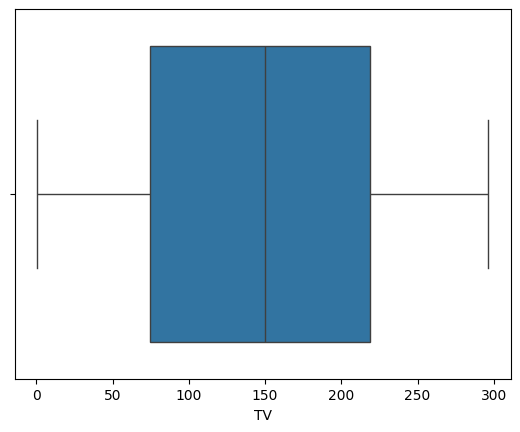

In [8]:
sns.boxplot(x=df["TV"])

<Axes: xlabel='Radio'>

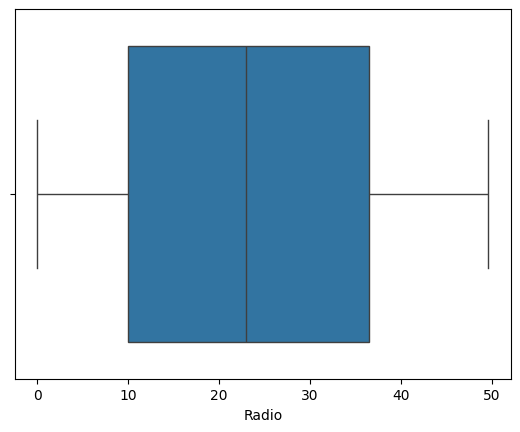

In [9]:
sns.boxplot(x=df["Radio"])

<Axes: xlabel='Newspaper'>

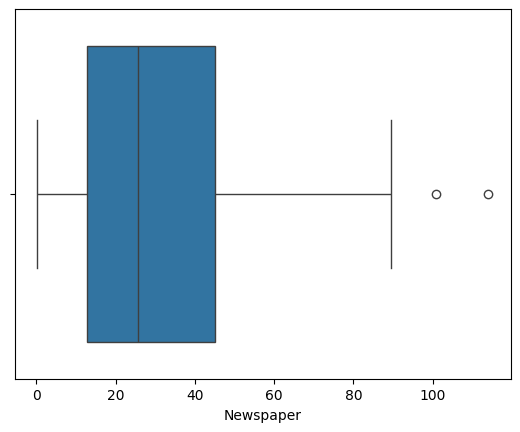

In [4]:
sns.boxplot(x=df["Newspaper"])

<Axes: xlabel='Newspaper'>

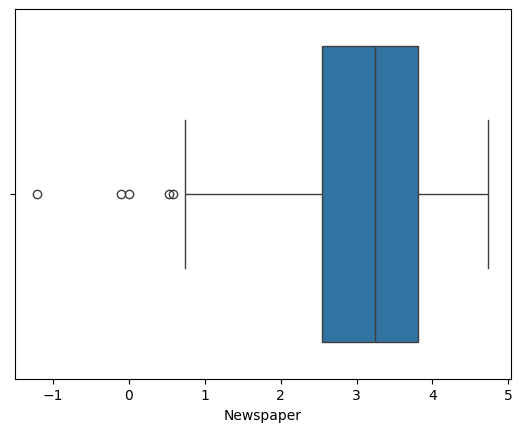

In [12]:
sns.boxplot(x = np.log(df["Newspaper"]))   # log doesnt do it

<Axes: xlabel='Newspaper'>

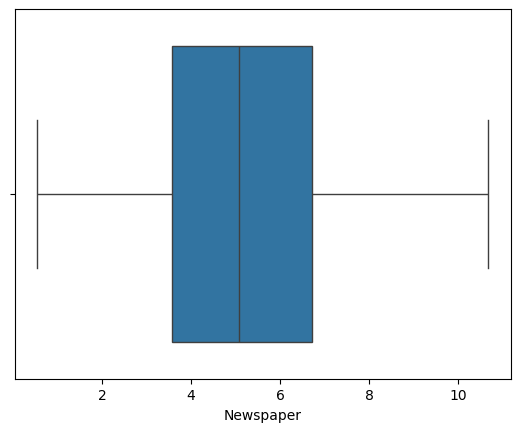

In [14]:
sns.boxplot(x = np.sqrt(df["Newspaper"]))   # sqrt does it

In [5]:
df["Newspaper"] = np.sqrt(df["Newspaper"])
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,8.318654,22.1
1,44.5,39.3,6.715653,10.4
2,17.2,45.9,8.324662,9.3
3,151.5,41.3,7.648529,18.5
4,180.8,10.8,7.641989,12.9
...,...,...,...,...
195,38.2,3.7,3.714835,7.6
196,94.2,4.9,2.846050,9.7
197,177.0,9.3,2.529822,12.8
198,283.6,42.0,8.136338,25.5


In [ ]:
Feature Engg conclusion : 
1. No null values present
2. Newspaper : column had outliers, used Square Root transformation to deal with them

### 5. Feature Selection

#### a. linearity

<Axes: >

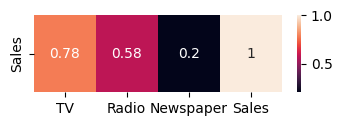

In [16]:
plt.figure(figsize=(4,1))
sns.heatmap(df.corr().tail(1),annot=True)

#### b. No multi

In [ ]:
Manually checking VIF because only 3 columns present

In [18]:
x = df.drop("Sales",axis=1)

In [19]:
variance_inflation_factor(x, 0)

3.036295876737775

In [10]:
variance_inflation_factor(x, 1)

3.645081974620569

In [11]:
variance_inflation_factor(x, 2)

4.7816296462654195

##### All less than 5 so good to go

#### c. Normality of residuals

In [21]:
residual_lin_reg = y_train_act - y_train_pred     # check this after model training

<Axes: xlabel='Sales', ylabel='Density'>

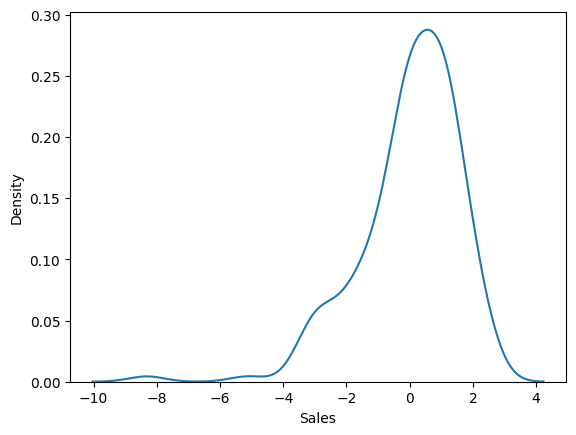

In [57]:
sns.kdeplot(residual_lin_reg)

<Axes: xlabel='Sales', ylabel='Density'>

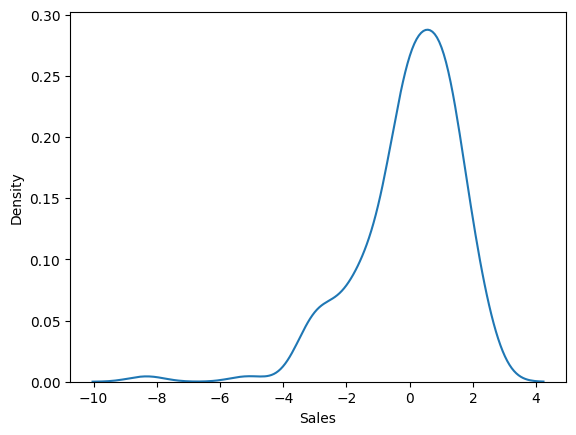

In [59]:
residual_ridge_reg = y_train_act - y_train_pred_ridge
sns.kdeplot(residual_ridge_reg)

In [ ]:
Feature Selection conclusion :
No need to drop any features as Linearity, No-multicolinearity & normality of residuals
are all good enough

### 6. Model Training

In [3]:
x = df.drop("Sales",axis=1)
y = df["Sales"]

x_train_act, x_test_act, y_train_act, y_test_act = train_test_split(x,y, test_size=0.2, random_state=2)
lin_reg = LinearRegression()
lin_reg.fit(x_train_act,y_train_act)

LinearRegression()

In [21]:
lin_reg.coef_

array([0.04733292, 0.17255044, 0.07253547])

In [22]:
lin_reg.intercept_

2.8433426594870674

### 7. Model Evaluation

#### 7.1 Train

In [23]:
y_train_act[:5]

137    20.8
163    18.0
111    21.8
123    15.2
109    19.8
Name: Sales, dtype: float64

In [4]:
y_train_pred = lin_reg.predict(x_train_act)
y_train_pred[:5]

array([21.29995014, 17.20629021, 21.19085727, 14.93544794, 19.83406828])

In [5]:
# Train Evaluation
MSE = mean_squared_error(y_train_act, y_train_pred)
print("MSE:",MSE)

rmse = np.sqrt(MSE)
print("RMSE:",rmse)

MAE = mean_absolute_error(y_train_act, y_train_pred)
print("MAE:",MAE)

r_squared =lin_reg.score(x_train_act,y_train_act)
print("R-Squared :",r_squared)

MSE: 2.469205292181747
RMSE: 1.5713705139723562
MAE: 1.1646205233859799
R-Squared : 0.9151707412454462


#### 7.2 Test

In [26]:
y_test_act[:5]

112    14.1
29     10.5
182     8.7
199    13.4
193    19.6
Name: Sales, dtype: float64

In [27]:
y_test_pred = lin_reg.predict(x_test_act)
y_test_pred[:5]

array([13.92938479,  9.40917323,  6.88229192, 15.52719589, 18.12321841])

In [6]:
# Test Evaluation
y_test_pred = lin_reg.predict(x_test_act)
MSE = mean_squared_error(y_test_act, y_test_pred)
print("MSE:",MSE)

rmse = np.sqrt(MSE)
print("RMSE:",rmse)

MAE = mean_absolute_error(y_test_act, y_test_pred)
print("MAE:",MAE)

r_squared =lin_reg.score(x_test_act, y_test_act)
print("R-Squared :",r_squared)

MSE: 4.503125945046126
RMSE: 2.1220570079632934
MAE: 1.6462745449078695
R-Squared : 0.7575894500772719


In [ ]:
Conclusion:
Train r2_score : 0.91
Test  r2_score : 0.75
Overfit observed : We will apply L1 and L2 Regularization

### 7. Regularization

In [ ]:
Since overfit is observed, we will apply L1 and L2 to see which gives the best results

In [7]:
from sklearn.linear_model import Lasso, Ridge

In [9]:
ridge_reg = Ridge()      # default alpha=1
ridge_reg.fit(x_train_act,y_train_act)

Ridge()

In [10]:
y_train_pred_ridge = ridge_reg.predict(x_train_act)
y_test_pred_ridge = ridge_reg.predict(x_test_act)
print("Ridge Evaluation:")


r_squared_train = r2_score(y_train_act, y_train_pred_ridge)
r_squared_test = r2_score(y_test_act, y_test_pred_ridge)
print("Train R-Squared:",r_squared_train)
print("Test R-Squared:",r_squared_test)

Ridge Evaluation:
Train R-Squared: 0.9151707410327866
Test R-Squared: 0.7575798054330486


In [11]:
lasso_reg = Lasso()   
lasso_reg.fit(x_train_act,y_train_act)

Lasso()

In [12]:
y_train_pred_ridge = lasso_reg.predict(x_train_act)
y_test_pred_ridge = lasso_reg.predict(x_test_act)
print("Ridge Evaluation:")


r_squared_train = r2_score(y_train_act, y_train_pred_ridge)
r_squared_test = r2_score(y_test_act, y_test_pred_ridge)
print("Train R-Squared:",r_squared_train)
print("Test R-Squared:",r_squared_test)

Ridge Evaluation:
Train R-Squared: 0.9149942251729244
Test R-Squared: 0.7521778644886357


In [ ]:
        train   test
Lasso : 0.87    0.84
Ridge : 0.91    0.75

### 8. Hpperparameter Tuning

In [ ]:
This is done in order to get the best alpha value

In [44]:
from sklearn.model_selection import GridSearchCV

In [13]:
ridge_reg = Ridge()
hyp_grid = {'alpha':np.arange(0.1,3,0.1)}
ridge_reg_gscv = GridSearchCV(estimator=ridge_reg, param_grid=hyp_grid, cv=4)
ridge_reg_gscv.fit(x_train_act,y_train_act)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9])})

In [14]:
ridge_reg_gscv.best_estimator_         # Use this in ridge_reg and see if accuracy increases

Ridge(alpha=0.1)

In [15]:
ridge_reg = ridge_reg_gscv.best_estimator_
ridge_reg.fit(x_train_act,y_train_act)
ridge_reg.fit(x_test_act,y_test_act)

y_train_pred = ridge_reg.predict(x_train_act)
r_squared_train = r2_score(y_train_act,y_train_pred)

y_test_pred = ridge_reg.predict(x_test_act) 
r_squared_test = r2_score(y_test_act,y_test_pred)


print("R-Squared Train:",r_squared_train)
print("R-Squared Test:",r_squared_test)

R-Squared Train: 0.8767642858069519
R-Squared Test: 0.8470395271887268


### 9. Save model

In [16]:
import pickle
with open("Advertisement.pkl",'wb') as f:
    pickle.dump(ridge_reg, f)

## B. Decision Tree

In [ ]:
Note : Feature scaling not required in Decision Tree

### 1. Model Traininng

In [54]:
x = df.drop("Sales",axis=1)
y = df["Sales"]

x_train_act, x_test_act, y_train_act, y_test_act = train_test_split(x,y, test_size=0.2, random_state=2)
dt_reg = DecisionTreeRegressor(random_state=1)
dt_reg.fit(x_train_act,y_train_act)

DecisionTreeRegressor(random_state=1)

In [56]:
plt.figure(figsize=(100,90))
tree = plot_tree(dt_reg, feature_names=x.columns, filled=True)
plt.savefig("before_hyp_tuning.png")

In [ ]:
Observations:
By default splitting is done till we get to pure node which in many cases, takes splitting till samples=1.
If samples=1, then obviously its a pure node. But in some cases, pure nodes are achieved earlier

Since this chart is wholly based on training data and we are splitting till we get pure nodes, train accuracy
is always 100%. This will reduce if we stop splitting before we get to pure node. That is done through changing
the parameters

Hyp-para-tuning will give us best parameter values

### 2. Model Evaluation

In [57]:
y_train_pred = dt_reg.predict(x_train_act)
r_squared = r2_score(y_train_act, y_train_pred)
print("Train score :",r_squared)

y_test_pred = dt_reg.predict(x_test_act)
r_squared = r2_score(y_test_act, y_test_pred)
print("Test score :",r_squared)

Train score : 1.0
Test score : 0.9532606987814877


### 3. Feature importance

In [ ]:
An Embedded feature selection method 

In [60]:
dt_reg.feature_importances_ 

array([0.6817038 , 0.31484153, 0.00345466])

In [ ]:
Conclusion : feature no. 3 = Newspaper, is clearly redundant

### 3. Hyperparameter Tuning

In [61]:
dt_model = DecisionTreeRegressor(random_state=1)

hyp_grid = {
            "criterion" :["squared_error", "friedman_mse", "absolute_error"],
            "max_depth" : np.arange(3,10),
            "min_samples_split" : range(5,20),
            "min_samples_leaf" : range(3,15)}

gscv_dt_model = GridSearchCV(dt_model,param_grid = hyp_grid, cv = 7,n_jobs  = -1)
gscv_dt_model.fit(x_train_act, y_train_act)   

GridSearchCV(cv=7, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': range(3, 15),
                         'min_samples_split': range(5, 20)})

In [62]:
gscv_dt_model.best_estimator_

DecisionTreeRegressor(max_depth=7, min_samples_leaf=4, min_samples_split=5,
                      random_state=1)

In [64]:
dt_reg = gscv_dt_model.best_estimator_
dt_reg.fit(x_train_act,y_train_act)
print("train:",dt_reg.score(x_train_act,y_train_act))
print("test:",dt_reg.score(x_test_act,y_test_act))

train: 0.9806161877488626
test: 0.948736570544143


In [ ]:
Decision Tree:
                             train     test
Before Hyperpara tuning :    1.0       0.95
After Hyperpara tuning :     0.98      0.95

## C. KNN

### c.1 without scaling

### 1. Model Training

In [65]:
knn_reg = KNeighborsRegressor(n_neighbors=3,p=2)
knn_reg.fit(x_train_act,y_train_act)

KNeighborsRegressor(n_neighbors=3)

### 2. Model Evaluation

In [66]:
print("Train Score:",knn_reg.score(x_train_act,y_train_act))
print("Test Score:",knn_reg.score(x_test_act,y_test_act))

Train Score: 0.9852803641159525
Test Score: 0.8949730204535097


In [ ]:
Conclusion : Overfit

### 3. Finding Best K value

Text(0, 0.5, 'Accuracy')

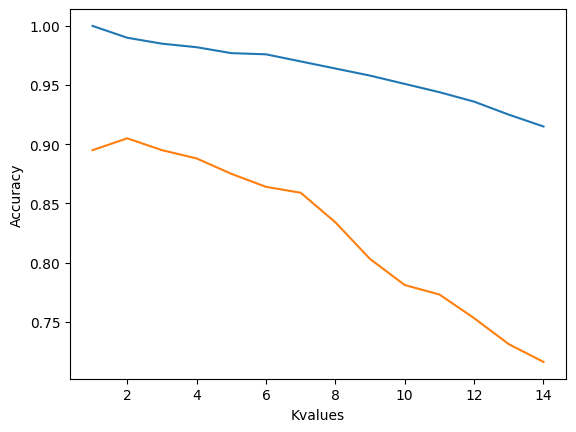

In [70]:
k_values = np.arange(1,15)   #p=2
train_acc_list = []
test_acc_list = []
for k in k_values:
    knn_clf = KNeighborsRegressor(n_neighbors=k, p = 2)
    knn_clf.fit(x_train_act, y_train_act)
    train_acc_list.append(np.around(knn_clf.score(x_train_act, y_train_act),3))
    test_acc_list.append(np.around(knn_clf.score(x_test_act, y_test_act),3))

plt.plot(k_values, train_acc_list)    
plt.plot(k_values, test_acc_list)

plt.xlabel("Kvalues")
plt.ylabel("Accuracy")    # Blue is train accuracy, orange is test accuracy

Text(0, 0.5, 'Accuracy')

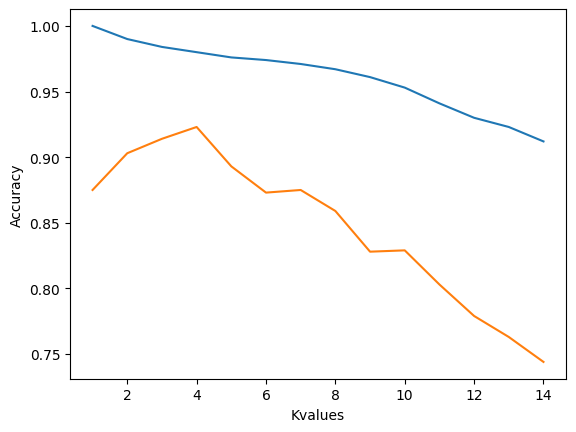

In [71]:
k_values = np.arange(1,15)     #p=1
train_acc_list = []
test_acc_list = []
for k in k_values:
    knn_clf = KNeighborsRegressor(n_neighbors=k, p = 1)
    knn_clf.fit(x_train_act, y_train_act)
    train_acc_list.append(np.around(knn_clf.score(x_train_act, y_train_act),3))
    test_acc_list.append(np.around(knn_clf.score(x_test_act, y_test_act),3))

plt.plot(k_values, train_acc_list)     # x axis, y axis
plt.plot(k_values, test_acc_list)

plt.xlabel("Kvalues")
plt.ylabel("Accuracy")    # Blue is train accuracy, orange is test accuracy

In [ ]:
 Best values : p=1, k=4

### 4. Trying with best values

In [73]:
knn_reg = KNeighborsRegressor(n_neighbors=4,p=1)   # p=1, k=4
knn_reg.fit(x_train_act,y_train_act)

print("Train Score:",knn_reg.score(x_train_act,y_train_act))
print("Test Score:",knn_reg.score(x_test_act,y_test_act))

Train Score: 0.9796790867441469
Test Score: 0.9232251800078796


In [ ]:
conclusion : Overfit reduced

### c.2 with scaling - Normalization

In [78]:
normal_scaler = MinMaxScaler()
df_x = normal_scaler.fit_transform(x)
df_x.shape 

(200, 3)

In [79]:
x_train_act, x_test_act, y_train_act, y_test_act = train_test_split(df_x,y, random_state=0, test_size=0.2)  # stratify - dont use in regression

#### Evaluation

In [80]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(x_train_act,y_train_act)
print("Train Score:",knn_reg.score(x_train_act,y_train_act))
print("Test Score:",knn_reg.score(x_test_act,y_test_act))

Train Score: 0.9662289595976309
Test Score: 0.9352092138584432


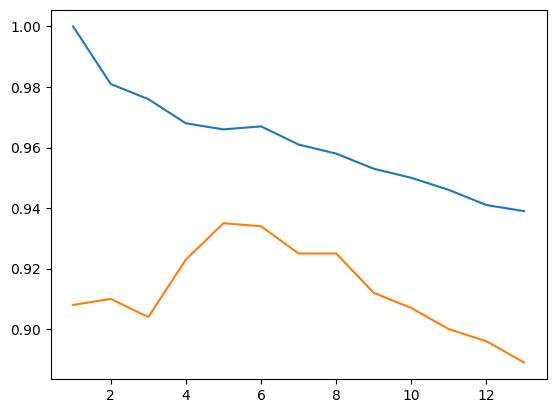

In [81]:
k_values = np.arange(1,14)      # p=2
train_r2_score = []
test_r2_score = []
for k in k_values:
    knn_reg =  KNeighborsRegressor(n_neighbors=k, p=2)
    knn_reg.fit(x_train_act, y_train_act)
    train_r2_score.append(np.around(knn_reg.score(x_train_act, y_train_act),3))
    test_r2_score.append(np.around(knn_reg.score(x_test_act, y_test_act),3))

plt.plot(k_values, train_r2_score)
plt.plot(k_values, test_r2_score)

Text(0, 0.5, 'Accuracy')

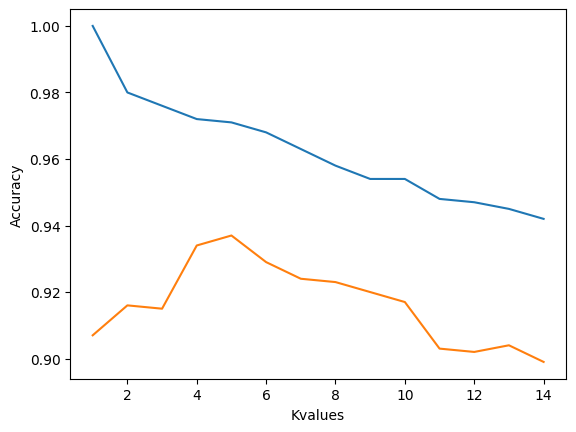

In [83]:
k_values = np.arange(1,15)     #p=1
train_acc_list = []
test_acc_list = []
for k in k_values:
    knn_clf = KNeighborsRegressor(n_neighbors=k, p = 1)
    knn_clf.fit(x_train_act, y_train_act)
    train_acc_list.append(np.around(knn_clf.score(x_train_act, y_train_act),3))
    test_acc_list.append(np.around(knn_clf.score(x_test_act, y_test_act),3))

plt.plot(k_values, train_acc_list)     # x axis, y axis
plt.plot(k_values, test_acc_list)

plt.xlabel("Kvalues")
plt.ylabel("Accuracy")    # Blue is train accuracy, orange is test accuracy

In [ ]:
Best value at n_neighbors=5 & p=1

#### Trying with best values

In [84]:
knn_reg = KNeighborsRegressor(n_neighbors=5,p=1)     # best value at k=5, p=1
knn_reg.fit(x_train_act,y_train_act)
print("Train Score:",knn_reg.score(x_train_act,y_train_act))
print("Test Score:",knn_reg.score(x_test_act,y_test_act))

Train Score: 0.9711170021155775
Test Score: 0.9365664034020302


## D. RandomForest

### 1. MOdel Training

In [11]:
x = df.drop("Sales",axis=1)
y = df["Sales"]

x_train_act, x_test_act, y_train_act, y_test_act = train_test_split(x,y, test_size=0.2, random_state=2)

In [12]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train_act,y_train_act)

RandomForestRegressor()

### 2. Model Evaluation

In [13]:
print("Train Score:",rf_reg.score(x_train_act,y_train_act))
print("Test Score:",rf_reg.score(x_test_act,y_test_act))

Train Score: 0.997131488375918
Test Score: 0.9757080065445789


### 3. feature importance

In [14]:
rf_reg.feature_importances_

array([0.69079323, 0.29692934, 0.01227743])

In [ ]:
Same colcusion as DecisionTree : column 3 is redundant

### 4. Hyperparameter Tuning

In [17]:
rf_model = RandomForestRegressor(random_state=1, n_jobs = -1)

hyp_grid = {"n_estimators":np.arange(10,80,10),
            "criterion" : ["squared_error", "absolute_error"],
            "max_depth" : np.arange(4,10,2),
            "min_samples_split" : range(8,16,2),
            "min_samples_leaf" : range(4,8,2)}

gscv_rf_model = GridSearchCV(rf_model,param_grid = hyp_grid, cv = 3,n_jobs  = -1)
gscv_rf_model.fit(x_train_act, y_train_act)

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1, random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': array([4, 6, 8]),
                         'min_samples_leaf': range(4, 8, 2),
                         'min_samples_split': range(8, 16, 2),
                         'n_estimators': array([10, 20, 30, 40, 50, 60, 70])})

In [19]:
gscv_rf_model.best_estimator_

RandomForestRegressor(max_depth=8, min_samples_leaf=4, min_samples_split=8,
                      n_estimators=70, n_jobs=-1, random_state=1)

In [22]:
rf_reg  = gscv_rf_model.best_estimator_
rf_reg.fit(x_train_act, y_train_act)
y_test_pred = rf_reg.predict(x_test_act)
y_train_pred = rf_reg.predict(x_train_act)

r_squared = r2_score(y_train_act, y_train_pred)
print("Train score :",r_squared)
r_squared = r2_score(y_test_act, y_test_pred)
print("Test score :",r_squared)

Train score : 0.9860040846428022
Test score : 0.9678344396255124


## E. AdaBoost

### 1. Model Training

In [104]:
x = df.drop("Sales",axis=1)
y = df["Sales"]
x_train_act, x_test_act,y_train_act, y_test_act = train_test_split(x,y,test_size=0.2, random_state=1)       # cant use stratify if continous o/p feature
adb_reg = AdaBoostRegressor()
adb_reg.fit(x_train_act,y_train_act)

AdaBoostRegressor()

### 2. Model Evaluation

In [105]:
print("Train Score:",adb_reg.score(x_train_act,y_train_act))
print("Test Score:",adb_reg.score(x_test_act,y_test_act))

Train Score: 0.9756286766926261
Test Score: 0.9632904066072382


### 3. Hyperparameter Tuning

In [106]:
adb_clf = AdaBoostRegressor(random_state=23)
hyp_grid = {'n_estimators':range(10,100,4),
            'learning_rate':np.arange(0,1,0.1)}
adb_gscv_model = GridSearchCV(adb_clf, param_grid=hyp_grid, cv=3)
adb_gscv_model.fit(x_train_act, y_train_act)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
69 fits failed out of a total of 690.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
69 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.p

GridSearchCV(cv=3, estimator=AdaBoostRegressor(random_state=23),
             param_grid={'learning_rate': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'n_estimators': range(10, 100, 4)})

In [107]:
adb_gscv_model.best_estimator_

AdaBoostRegressor(learning_rate=0.7000000000000001, n_estimators=94,
                  random_state=23)

In [108]:
adb_reg = adb_gscv_model.best_estimator_

print("Train Score:",adb_reg.score(x_train_act,y_train_act))
print("Test Score:",adb_reg.score(x_test_act,y_test_act))

Train Score: 0.9789534408481957
Test Score: 0.9698023792610573


## conclusion

In [ ]:
              Initial            after hyp_para_tune

           Train     Test         Train     Test
Lin_reg     0.91     0.75          0.88     0.85
Dec Tree     1.0     0.95          0.98      0.95
KNN         0.98     0.92          0.97      0.94   # after scaling  
RF          0.99     0.97          0.98      0.96
AdaBoost    0.97     0.96          0.98      0.97